In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
df = pd.read_csv('train.csv')
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
'''
First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?
'''

'\nFirst some basic questions:\n\n1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)\n2.) What deck were the passengers on and how does that relate to their class?\n3.) Where did the passengers come from?\n4.) Who was alone and who was with family?\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

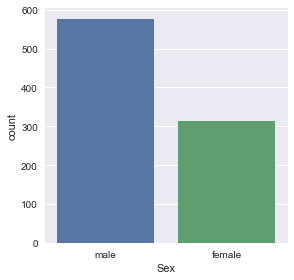

In [7]:
sns.factorplot('Sex',data=df,kind="count")

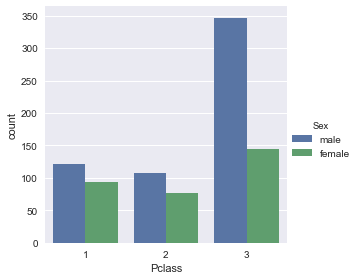

In [9]:
sns.factorplot('Pclass',data = df, kind='count', hue = 'Sex')

In [10]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else: 
        return sex
df['Person'] = df[['Age','Sex']].apply(male_female_child,axis=1)

In [15]:
df[0:6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male


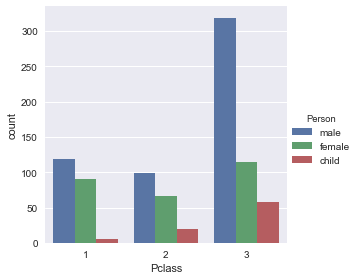

In [101]:
sns.factorplot('Pclass', data = df, kind = 'count',hue = 'Person')

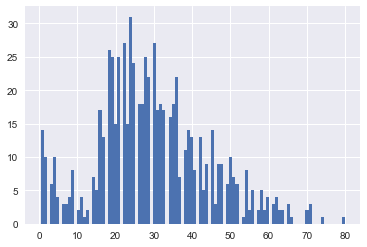

In [26]:
df['Age'].hist(bins = 100)

In [29]:
df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

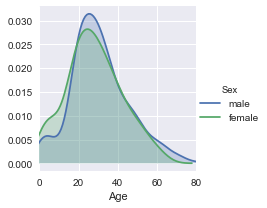

In [47]:
fig = sns.FacetGrid(df,hue='Sex')

fig.map(sns.kdeplot,'Age',shade=True)

#oldest = df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

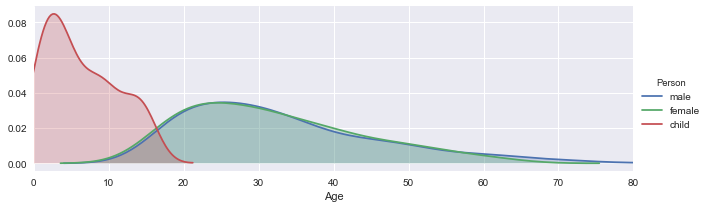

In [57]:
fig = sns.FacetGrid(df,hue='Person',aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [75]:
deck = df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

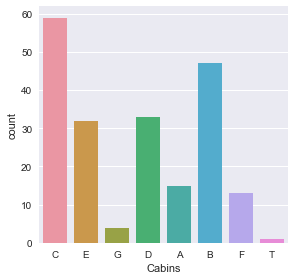

In [96]:
levels = []
for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabins']
cabin_df
sns.factorplot('Cabins',data =cabin_df,kind = 'count')


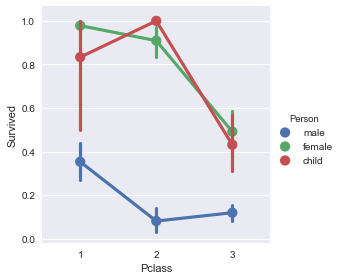

In [102]:
sns.factorplot('Pclass','Survived',hue='Person',data=df)

In [105]:
sns.Implot('Age','Survived',data = df)

AttributeError: 'module' object has no attribute 'Implot'

In [106]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')